In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import zipfile
import os

import warnings

warnings.filterwarnings('ignore')

# Extract CSV zip files
if not os.path.isfile('mhealth_raw_data.csv'):
    with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
        zip_ref.extractall('.')

m_health_raw_data = pd.read_csv('mhealth_raw_data.csv')

In [2]:
# Let's sample 10000 entries for each category
# Drop the subject column
m_health_data = m_health_raw_data.drop('subject', axis=1)
seed=42

df = pd.DataFrame()
for i in m_health_data['Activity'].unique():
    samples = m_health_data[m_health_data['Activity'] == i].sample(random_state=seed, n=10000)
    df = pd.concat([df, samples])

ms = df.copy()
display(ms.head())

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
1212350,1.33590,-9.7394,-1.66110,0.58813,-0.58724,-0.662080,-3.2703,-9.05310,-0.30682,0.401960,-1.06160,0.14655,0
134482,2.52730,-12.7320,-3.88220,0.51763,-0.58537,-0.758350,-4.3463,-10.51300,1.71390,-0.272550,-0.76591,0.85129,0
820343,0.55205,-9.7466,1.58070,0.55288,-0.76173,-0.176820,-5.8155,-8.16430,-2.42900,0.137250,-0.99795,0.52155,0
718210,2.49960,-9.3680,1.81700,0.73655,-0.55159,0.068762,-3.0504,-5.91350,4.65220,0.084314,-0.71047,0.90086,0
118798,-3.48370,-9.2520,0.54423,-0.37662,-0.61163,0.609040,-6.5952,-0.79894,7.10590,-0.900000,1.14580,0.81897,0


In [3]:
# feature expansion magnitude of acceleration
ms['Magnitude Left Acc'] = np.sqrt(ms['alx']**2 + ms['aly']**2 + ms['alz']**2)
ms['Magnitude Right Acc'] = np.sqrt(ms['arx']**2 + ms['ary']**2 + ms['arz']**2)
display(ms.columns)
display(ms.describe())

Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'Magnitude Left Acc', 'Magnitude Right Acc'],
      dtype='object')

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,Magnitude Left Acc,Magnitude Right Acc
count,130000.000000,130000.000000,130000.000000,130000.000000,130000.00000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000
mean,1.712190,-9.092605,-0.833864,0.081737,-0.56323,-0.137402,-3.520445,-5.656282,2.318159,-0.228825,-0.416495,0.358143,6.000000,12.194571,11.088392
std,4.431388,5.286531,6.568060,0.467020,0.41718,0.554810,6.041450,6.593481,4.251687,0.543354,0.544666,0.528319,3.741672,5.321501,4.985766
min,-22.146000,-19.609000,-19.365000,-1.777400,-7.78990,-2.622800,-22.345000,-18.972000,-18.230000,-2.219600,-3.552400,-2.504300,0.000000,0.537706,0.144361
25%,0.082362,-10.137000,-3.664900,-0.374770,-0.81051,-0.591360,-5.221425,-9.535500,0.051838,-0.696080,-0.839840,-0.077586,3.000000,9.752254,8.997784
50%,1.332000,-9.601300,0.261925,0.172540,-0.69043,-0.123770,-2.504100,-7.562000,1.776100,-0.333330,-0.597540,0.424570,6.000000,9.949205,9.794379
75%,2.892000,-7.492100,1.771100,0.484230,-0.49719,0.345780,-0.517068,-1.843100,5.181400,0.205880,-0.051335,0.829740,9.000000,12.261475,11.498591
max,20.033000,21.161000,25.005000,1.705000,1.97750,1.799600,19.801000,21.965000,25.741000,1.429400,1.540000,2.254300,12.000000,38.929267,40.500573


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def GenerateReport(model, X_train, X_test, y_train, y_test):
    # Checking training error
    y_train_pred = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_train_pred)
    conf_matrix = confusion_matrix(y_train, y_train_pred)
    class_report = classification_report(y_train, y_train_pred)

    # Printing accuracy, precision, and recall
    print("Train Accuracy:", accuracy)
    print("Train Classification Report:")
    print(class_report)

    # Checking testing error
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    print("Test Accuracy:", accuracy)
    print("Test Classification Report:")
    print(class_report)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(ms.drop(['Activity'], axis = 1), ms['Activity'], test_size=0.1, random_state=seed)

# Scale the input data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

lin_reg_model = LinearRegression()

# Fitting the model to the training data
lin_reg_model.fit(X_train, y_train)

y_train_pred = lin_reg_model.predict(X_train)
y_train_pred = y_train_pred.round()
accuracy = accuracy_score(y_train, y_train_pred)
print(accuracy)

y_test_pred = lin_reg_model.predict(X_test)
y_test_pred = y_test_pred.round()
accuracy2 = accuracy_score(y_test, y_test_pred)
print(accuracy2)

#GenerateReport(lin_reg_model, X_train, X_test, y_train, y_test)

0.13762393162393163
0.14846153846153845


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

print("Running")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(ms.drop(['Activity'], axis = 1), ms['Activity'], test_size=0.1, random_state=seed)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Initialize and train the model
for i in range(5):
    print("Running")
    k = i * 2 + 11
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    print("Running")
    GenerateReport(knn, X_train, X_test, y_train, y_test)

Running
Running
Running
Train Accuracy: 0.9385128205128205
Train Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.54      0.68      8975
           1       0.97      1.00      0.99      8993
           2       0.98      1.00      0.99      8985
           3       0.99      1.00      0.99      8985
           4       0.87      1.00      0.93      9008
           5       0.94      0.92      0.93      9028
           6       0.94      0.99      0.96      9009
           7       0.93      0.99      0.96      8942
           8       0.92      0.99      0.95      9006
           9       0.96      1.00      0.98      9020
          10       0.90      0.95      0.92      9011
          11       0.92      0.94      0.93      9051
          12       0.96      0.89      0.92      8987

    accuracy                           0.94    117000
   macro avg       0.94      0.94      0.93    117000
weighted avg       0.94      0.94      0.93   

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

print("Running")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(ms.drop(['Activity'], axis = 1), ms['Activity'], test_size=0.1, random_state=seed)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

k = 19
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

print("Running")
GenerateReport(knn, X_train, X_test, y_train, y_test)

Running
Running
Train Accuracy: 0.9257606837606838
Train Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.47      0.62      8975
           1       0.96      1.00      0.98      8993
           2       0.98      1.00      0.99      8985
           3       0.98      1.00      0.99      8985
           4       0.84      0.99      0.91      9008
           5       0.93      0.87      0.90      9028
           6       0.92      0.99      0.95      9009
           7       0.92      0.99      0.95      8942
           8       0.90      0.99      0.94      9006
           9       0.95      1.00      0.97      9020
          10       0.88      0.94      0.91      9011
          11       0.91      0.94      0.92      9051
          12       0.95      0.86      0.90      8987

    accuracy                           0.93    117000
   macro avg       0.93      0.93      0.92    117000
weighted avg       0.93      0.93      0.92    117000


In [8]:
# Let's sample 1000 entries for each category for the SVM
# Drop the subject column
m_health_data = m_health_raw_data.drop('subject', axis=1)
seed=42

df = pd.DataFrame()
for i in m_health_data['Activity'].unique():
    samples = m_health_data[m_health_data['Activity'] == i].sample(random_state=seed, n=1000)
    df = pd.concat([df, samples])

ms = df.copy()
display(ms.head())

# feature expansion magnitude of acceleration
ms['Magnitude Left Acc'] = np.sqrt(ms['alx']**2 + ms['aly']**2 + ms['alz']**2)
ms['Magnitude Right Acc'] = np.sqrt(ms['arx']**2 + ms['ary']**2 + ms['arz']**2)
display(ms.columns)
display(ms.describe())

X_train, X_test, y_train, y_test = train_test_split(ms.drop(['Activity'], axis = 1), ms['Activity'], test_size=0.1, random_state=seed)

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
1212350,1.33590,-9.7394,-1.66110,0.58813,-0.58724,-0.662080,-3.2703,-9.05310,-0.30682,0.401960,-1.06160,0.14655,0
134482,2.52730,-12.7320,-3.88220,0.51763,-0.58537,-0.758350,-4.3463,-10.51300,1.71390,-0.272550,-0.76591,0.85129,0
820343,0.55205,-9.7466,1.58070,0.55288,-0.76173,-0.176820,-5.8155,-8.16430,-2.42900,0.137250,-0.99795,0.52155,0
718210,2.49960,-9.3680,1.81700,0.73655,-0.55159,0.068762,-3.0504,-5.91350,4.65220,0.084314,-0.71047,0.90086,0
118798,-3.48370,-9.2520,0.54423,-0.37662,-0.61163,0.609040,-6.5952,-0.79894,7.10590,-0.900000,1.14580,0.81897,0


Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'Magnitude Left Acc', 'Magnitude Right Acc'],
      dtype='object')

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,Magnitude Left Acc,Magnitude Right Acc
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000
mean,1.710203,-9.077714,-0.757218,0.080622,-0.564444,-0.139305,-3.462329,-5.540851,2.285552,-0.234437,-0.417676,0.355221,6.000000,12.201214,10.975043
std,4.492552,5.352048,6.548589,0.467756,0.417393,0.553625,5.956603,6.571494,4.158290,0.543855,0.543898,0.528269,3.741801,5.360974,4.838633
min,-22.075000,-19.590000,-19.364000,-1.680900,-2.594700,-2.400800,-22.221000,-18.932000,-18.228000,-1.764700,-3.112900,-1.588400,0.000000,1.002524,0.677570
25%,0.104772,-10.116500,-3.529450,-0.384040,-0.810510,-0.589390,-5.171950,-9.502000,0.064240,-0.700000,-0.835730,-0.075970,3.000000,9.755693,8.977011
50%,1.339550,-9.603200,0.312455,0.176250,-0.692310,-0.127700,-2.500050,-7.519000,1.763700,-0.341180,-0.601640,0.420260,6.000000,9.945730,9.790397
75%,2.890950,-7.470750,1.802375,0.482370,-0.495310,0.342340,-0.522805,-1.690025,5.059125,0.196080,-0.055441,0.827590,9.000000,12.241402,11.392067
max,20.024000,21.000000,24.843000,1.582600,1.684800,1.534400,19.692000,21.924000,24.560000,1.305900,1.205300,1.926700,12.000000,38.906480,38.407873


Training Kernel: linear
Train Accuracy: 0.5313675213675214
Train Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.06      0.05       891
           1       0.69      0.99      0.81       900
           2       0.82      0.82      0.82       895
           3       0.98      1.00      0.99       898
           4       0.53      0.26      0.34       893
           5       0.28      0.09      0.13       913
           6       0.57      0.58      0.58       896
           7       0.70      0.56      0.62       911
           8       0.36      0.80      0.50       898
           9       0.88      0.95      0.91       885
          10       0.34      0.15      0.20       902
          11       0.45      0.23      0.31       900
          12       0.32      0.44      0.37       918

    accuracy                           0.53     11700
   macro avg       0.54      0.53      0.51     11700
weighted avg       0.54      0.53      0.51   

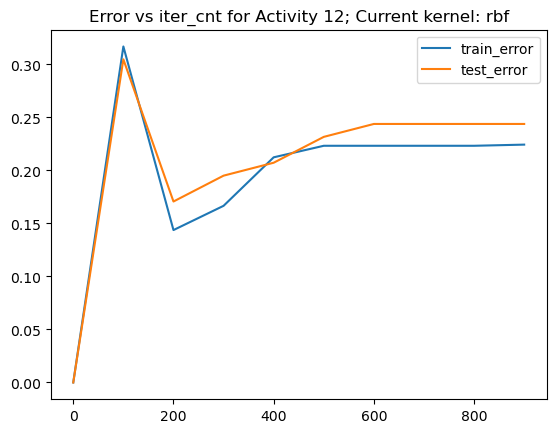

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

kernels = ['linear', 'rbf']
svm_models = {}
iterations = 1000
step = 100
classes = np.unique(y_train)
x_Val = range(0,iterations,step)

for kernel in kernels:
    train_error = np.zeros((13, iterations//step))
    test_error = np.zeros((13, iterations//step))
    print("Training Kernel: " + kernel)

    # Using different max_iter
    for i in range(0,iterations,step):
      svm_models[kernel] = SVC(kernel=kernel, max_iter=i)
      svm_models[kernel].fit(X_train, y_train)

      train_hat = svm_models[kernel].predict(X_train)
      test_hat = svm_models[kernel].predict(X_test)
      # Getting accuracy for each activity
      pos = 0
      for cls in classes:
        classes_train_indx = y_train == cls
        classes_test_indx = y_test == cls
        train_error[pos, i//step] = 1 - accuracy_score(y_train[classes_train_indx], train_hat[classes_train_indx])
        test_error[pos, i//step] = 1 - accuracy_score(y_test[classes_test_indx], test_hat[classes_test_indx])
        pos += 1
    
    # Plotting for each activity (storing plot as png)
    for i in range(classes.shape[0]):
      plt.clf()
      plt.title(f"Error vs iter_cnt for Activity {i}; Current kernel: {kernel}")
      plt.plot(x_Val, train_error[i,:], label = "train_error")
      plt.plot(x_Val, test_error[i,:], label = "test_error")
      plt.legend()
      plt.savefig(f".\svm_kernel\plot_{kernel}_{i}.png")



    GenerateReport(svm_models[kernel], X_train, X_test, y_train, y_test)
    

Training polynomial degree 3
Train Accuracy: 0.7188888888888889
Train Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.16      0.25       891
           1       0.51      0.94      0.67       900
           2       0.79      0.87      0.83       895
           3       0.98      1.00      0.99       898
           4       0.65      0.58      0.61       893
           5       0.61      0.54      0.57       913
           6       0.65      0.70      0.67       896
           7       0.86      0.75      0.80       911
           8       0.58      0.62      0.60       898
           9       0.89      0.90      0.89       885
          10       0.72      0.75      0.73       902
          11       0.80      0.75      0.77       900
          12       0.85      0.78      0.81       918

    accuracy                           0.72     11700
   macro avg       0.72      0.72      0.71     11700
weighted avg       0.72      0.72      0.

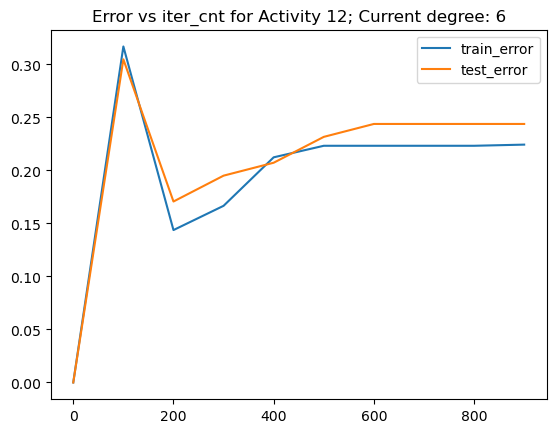

In [79]:
degree_accuracy = np.zeros((4,2,iterations))
for degree in range(3, 7):
    print("Training polynomial degree " + str(degree))
    train_error = np.zeros((13, iterations//step))
    test_error = np.zeros((13, iterations//step))
    key = 'poly-' + str(degree)

    # Using different max_iter
    for i in range(0,iterations,step):
      svm_models[key] = SVC(kernel=kernel, degree=degree, max_iter=i)
      svm_models[key].fit(X_train, y_train)

      # Getting predictions
      train_hat = svm_models[key].predict(X_train)
      test_hat = svm_models[key].predict(X_test)

      # Getting accuracy for each activity
      pos = 0
      for cls in classes:
        classes_train_indx = y_train == cls
        classes_test_indx = y_test == cls
        train_error[pos, i//step] = 1 - accuracy_score(y_train[classes_train_indx], train_hat[classes_train_indx])
        test_error[pos, i//step] = 1 - accuracy_score(y_test[classes_test_indx], test_hat[classes_test_indx])
        pos += 1


    # Plotting for each activity (storing plot as png)
    for i in range(classes.shape[0]):
      plt.clf()
      plt.title(f"Error vs iter_cnt for Activity {i}; Current degree: {degree}")
      plt.plot(x_Val, train_error[i,:], label = "train_error")
      plt.plot(x_Val, test_error[i,:], label = "test_error")
      plt.legend()
      plt.savefig(f".\svm_degree\plot_{degree}_{i}.png")


    GenerateReport(svm_models[key], X_train, X_test, y_train, y_test)

In [21]:
y_test


490649     7
456695     1
354807     0
814547     7
340245     8
          ..
280179     0
88893     10
793675     3
824702     9
267114    11
Name: Activity, Length: 13000, dtype: int64